# Problem Statements

For a safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

# Objective

Create a model that predicts whether or not an applicant will be able to repay a loan using historical data

**Analysis to be done:** Perform data preprocessing and build a deep learning prediction model

**Steps to be done:**

* Load the dataset that is given to you
* Check for null values in the dataset
* Print the percentage of default to a payer of the dataset for the TARGET column
* Balance the dataset if the data is imbalanced
* Plot the balanced or imbalanced data
* Encode the columns that are required for the model
* Calculate sensitivity as a metric
* Calculate the area under the receiver operating characteristics curve

In [ ]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load Data and Perform basic data analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset into a dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practice/Deep Learning/Projects/Project2/home_loan_data.csv')

In [ ]:
# Display first five rows
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# Display last five rows
df.tail(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1
9577,0,debt_consolidation,0.1392,853.43,11.264464,16.28,732,4740.000000,37879,57.0,6,0,0,1


In [ ]:
# Gather basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [ ]:
# Get the shape of the data
df.shape

(9578, 14)

In [ ]:
# Gather descriptive statistics about the data
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [ ]:
# Display all column names
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

# Step 2: Perform Data Quality Checks & EDA

## 2.1 Check null and duplicate values in dataset

In [ ]:
# Check for missing values
print(df.isnull().sum())

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


Result: No missing value found

In [ ]:
# check for duplidate values
df.duplicated().sum()

np.int64(0)

## 2.2 Data Encoding

In [ ]:
# Transform categorical values into numerical values (discrete)
df=pd.get_dummies(df,columns=['purpose'],drop_first=True, dtype=int)

In [ ]:
df.head(5)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Step 2.3: Draw Correlation Heatmap

Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

In [ ]:
df.corr(numeric_only=True)

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.003216,0.020193,-0.031346,0.006036,0.024281,-0.003511
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.042109,0.123607,-0.019618,-0.050697,-0.068978,0.151247
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.000774,0.161658,-0.094510,0.023024,-0.079836,0.145654
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.072942,-0.026214,-0.119799,0.116375,-0.031020,0.091540
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.084476,0.179149,-0.035325,-0.092788,-0.077719,-0.069245
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,-0.012512,-0.154132,-0.013012,0.097474,0.067129,0.063292
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,0.046220,-0.009318,-0.042621,0.068087,-0.020561,0.034883
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.072316,0.005785,-0.034743,0.003258,-0.062395,0.083069
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,0.091321,0.211869,-0.053128,-0.114449,-0.108079,-0.060962
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.033640,-0.044240,0.024243,0.043827,-0.001445,0.042567


<Axes: >

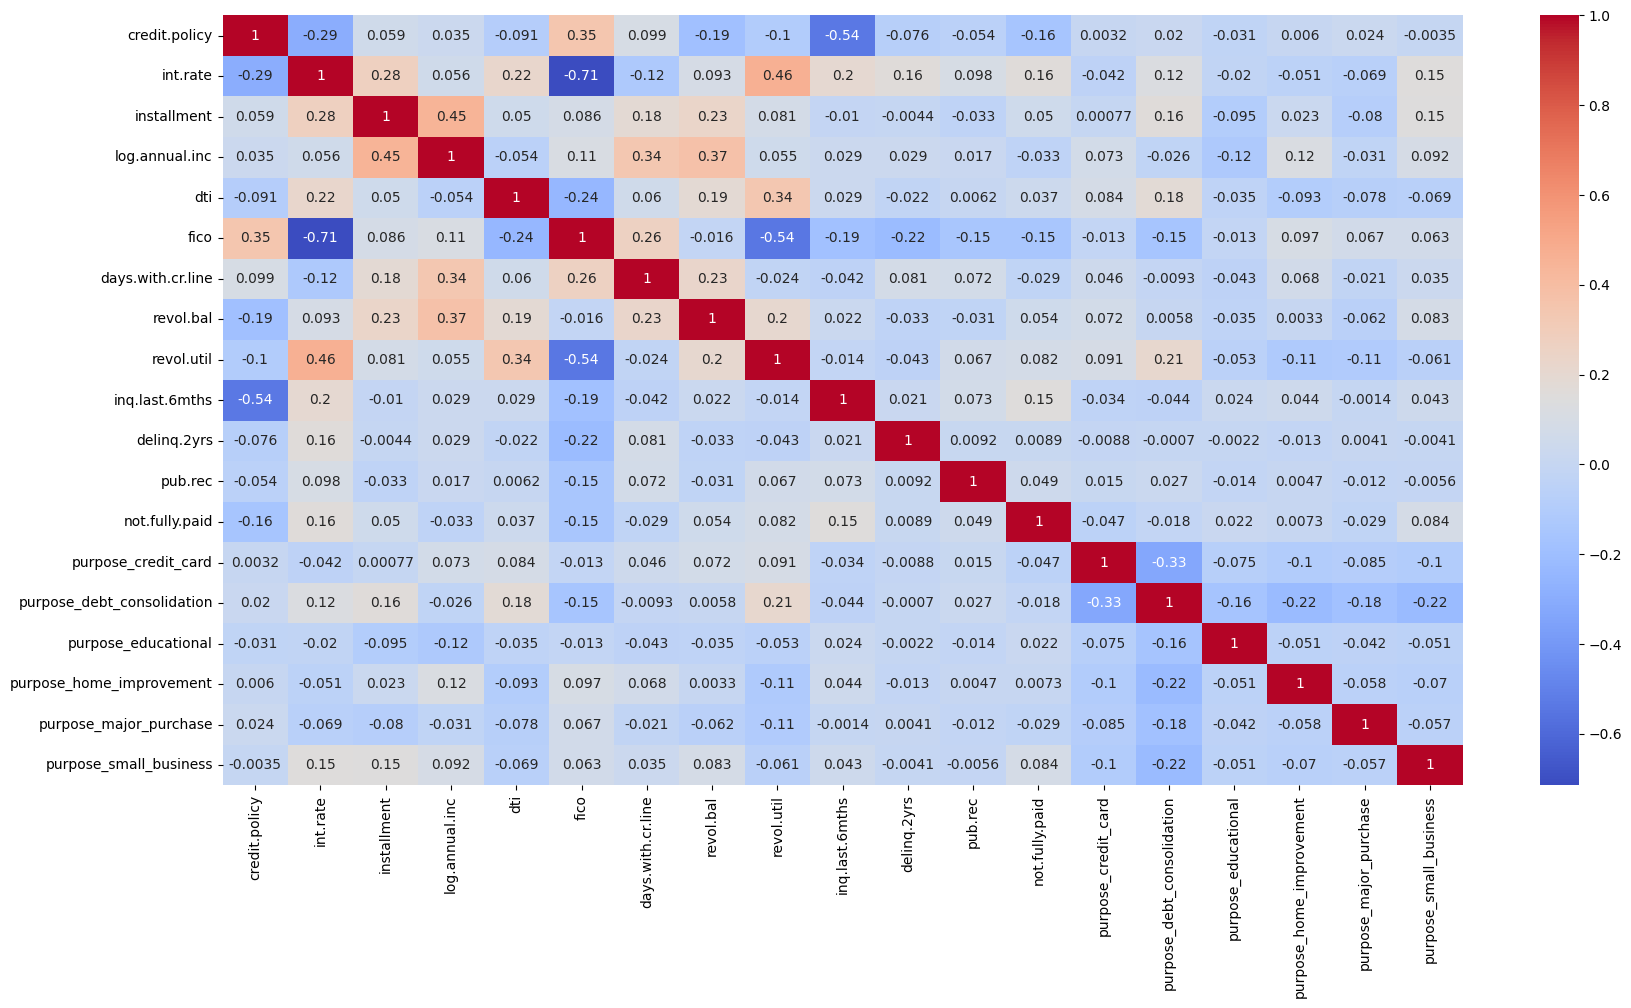

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')

#Step 3:Print the percentage of default to a payer of the dataset for the TARGET column

In [ ]:
df['credit.policy'].value_counts()

,count
credit.policy,
1,7710
0,1868


In [ ]:
#Print the percentage of default to a payer of the dataset for the TARGET column
default_percentage = (df['credit.policy'].value_counts(normalize=True) * 100)
default_percentage


,proportion
credit.policy,
1,80.496972
0,19.503028


### Observation

Data is highly imbalanced

# Step 4:  Handle the Imbalanced data

## 4.1 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=42.

In [ ]:
# Train the model
X=df.drop('credit.policy',axis=1)
y=df['credit.policy']

from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

## 4.2 Upsample the train dataset using the SMOTE technique

In [ ]:
# Balance the dataset if the data is imbalanced
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create a new balanced DataFrame
df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['credit.policy'] = y_resampled

# Print the balanced class distribution
print(df_balanced['credit.policy'].value_counts())


credit.policy
1    6168
0    6168
Name: count, dtype: int64


#5 Plot the balanced or imbalanced data

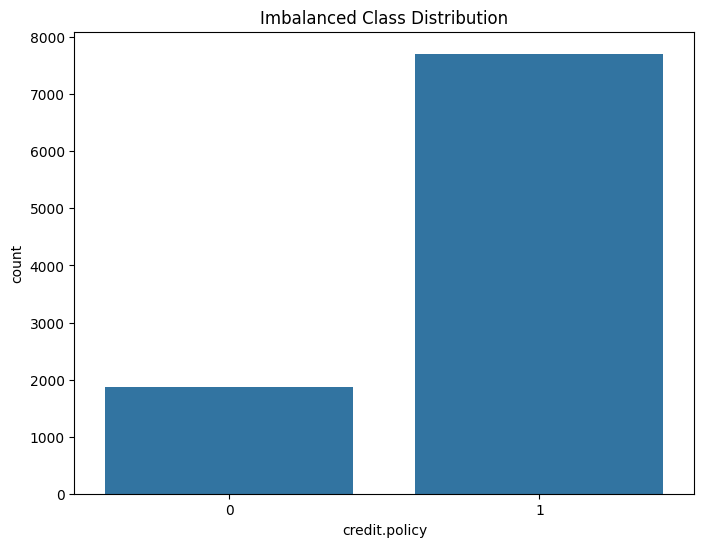

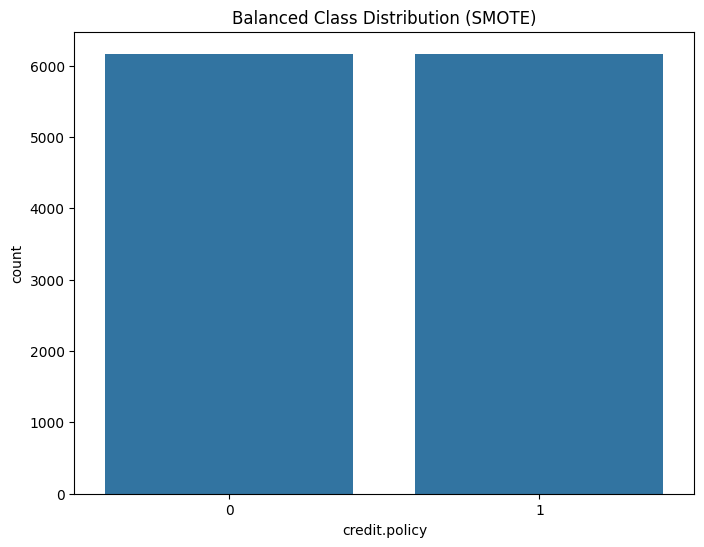

In [ ]:
# Plot the balanced or imbalanced data
import matplotlib.pyplot as plt
# Plot the imbalanced data
plt.figure(figsize=(8, 6))
sns.countplot(x='credit.policy', data=df)
plt.title('Imbalanced Class Distribution')
plt.show()

# Plot the balanced data
plt.figure(figsize=(8, 6))
sns.countplot(x='credit.policy', data=df_balanced)
plt.title('Balanced Class Distribution (SMOTE)')
plt.show()


# Step 6: Encode the columns that are required for the model

Alredy handled in Step 1

# Step 7: Calculate sensitivity as a metric

In [ ]:
# Perform standard Scaling

from sklearn.preprocessing import StandardScaler

# Assuming X_resampled and X_test are your feature dataframes after SMOTE
scaler = StandardScaler()

# Fit the scaler on the training data
X_train_scaled = scaler.fit_transform(X_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Build the model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# Build a basic model architecture
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Binary classification output
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Define EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
# Train the model
history = model.fit(X_train_scaled, y_resampled,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

Epoch 1/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7965 - loss: 0.4290 - val_accuracy: 0.9032 - val_loss: 0.2533
Epoch 2/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.2755 - val_accuracy: 0.8558 - val_loss: 0.3406
Epoch 3/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8909 - loss: 0.2633 - val_accuracy: 0.8955 - val_loss: 0.2609
Epoch 4/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.2569 - val_accuracy: 0.8938 - val_loss: 0.2622
Epoch 5/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2326 - val_accuracy: 0.9084 - val_loss: 0.2254
Epoch 6/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.2391 - val_accuracy: 0.8983 - val_loss: 0.2362
Epoch 7/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9137 - loss: 0.2144 - val_accuracy: 0.9015 - val_loss: 0.2432
Epoch 8/100
309/309 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9091 - loss: 0.2159 - val_accu

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9417 - loss: 0.1555

Test Loss: 0.1697
Test Accuracy: 0.9384


In [ ]:
# Predict probabilities for the basic and best models
predictions_proba = model.predict(X_test_scaled)
predictions = (predictions_proba > 0.5).astype(int)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt

In [ ]:
# Calculate sensitivity as a metric

# Calculate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Extract true positives, false positives, true negatives, and false negatives
TN, FP, FN, TP = cm.ravel()

# Calculate sensitivity
sensitivity = TP / (TP + FN)

print(f"Sensitivity: {sensitivity}")

Sensitivity: 0.9455252918287937


# Step 8: Calculate the area under the receiver operating characteristics curve

In [ ]:
# Print classification report for basic model
print("Model Classification Report:")
print(classification_report(y_test, predictions))

Model Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       374
           1       0.98      0.95      0.96      1542

    accuracy                           0.94      1916
   macro avg       0.89      0.93      0.91      1916
weighted avg       0.94      0.94      0.94      1916



In [ ]:
# Calculate and print ROC AUC for the model
auc_score = roc_auc_score(y_test, predictions_proba)
print("Model ROC AUC:", auc_score)

Model ROC AUC: 0.9773663621798206


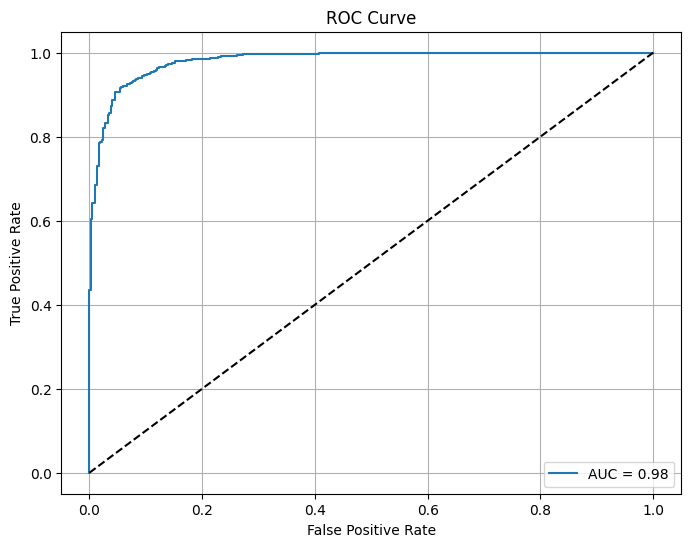

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, predictions_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()